In [87]:
import warnings
warnings.filterwarnings('ignore')

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import tensorflow as tf
import numpy as np

## Import from CSV file

In [49]:
# Import data
df = pd.read_csv('Resources/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Preprocessing

In [50]:
# Set 'custormerid' column as the index
df.set_index('customerID', inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [51]:
# Check data type
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [52]:
# Change 'TotalCharges' column type to 'float64' 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [53]:
# Check data type
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [54]:
# Drop NaNs
df.dropna(inplace = True)

In [55]:
# Check for null value 
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [56]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [57]:
# Generate our categorical variable lists
cat = df.dtypes[df.dtypes == 'object'].index.tolist()
cat

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

## Pyaret 

In [58]:
from pycaret.classification import *
s = setup(df, target = 'Churn')

,Description,Value
0,session_id,7979
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(7032, 20)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [59]:
# compare all models
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7977,0.8352,0.5217,0.6423,0.5751,0.4443,0.4488,0.7730
ada,Ada Boost Classifier,0.7974,0.8332,0.5109,0.6461,0.5692,0.4395,0.4454,0.1500
gbc,Gradient Boosting Classifier,0.7962,0.8330,0.5024,0.6454,0.5638,0.4338,0.4402,0.3400
lda,Linear Discriminant Analysis,0.7932,0.8286,0.5255,0.6272,0.5713,0.4366,0.4398,0.0390
nb,Naive Bayes,0.7434,0.8228,0.7682,0.5081,0.6114,0.4315,0.4525,0.0150
lightgbm,Light Gradient Boosting Machine,0.7848,0.8224,0.4954,0.6125,0.5467,0.4081,0.4125,0.0760
rf,Random Forest Classifier,0.7814,0.8089,0.4621,0.6126,0.5260,0.3877,0.3947,0.4720
et,Extra Trees Classifier,0.7651,0.7764,0.4459,0.5693,0.4983,0.3485,0.3538,0.4630
knn,K Neighbors Classifier,0.7584,0.7372,0.4243,0.5532,0.4787,0.3256,0.3312,0.0970
dt,Decision Tree Classifier,0.7170,0.6414,0.4799,0.4643,0.4712,0.2783,0.2788,0.0350


In [60]:
# print best_model parameters
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7979, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [61]:
# tune best model
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7789,0.8266,0.5231,0.5913,0.5551,0.4087,0.4101
1,0.7850,0.8360,0.5077,0.6111,0.5546,0.4145,0.4176
2,0.8028,0.8125,0.5039,0.6633,0.5727,0.4476,0.4548
3,0.8028,0.8543,0.5194,0.6569,0.5801,0.4536,0.4589
4,0.8211,0.8544,0.5736,0.6916,0.6271,0.5108,0.5147
5,0.8130,0.8405,0.5504,0.6762,0.6068,0.4859,0.4903
6,0.7967,0.8345,0.5426,0.6306,0.5833,0.4499,0.4521
7,0.7846,0.8216,0.4729,0.6162,0.5351,0.3980,0.4039
8,0.8130,0.8399,0.5846,0.6667,0.6230,0.4993,0.5012
9,0.7886,0.8311,0.4692,0.6354,0.5398,0.4066,0.4145


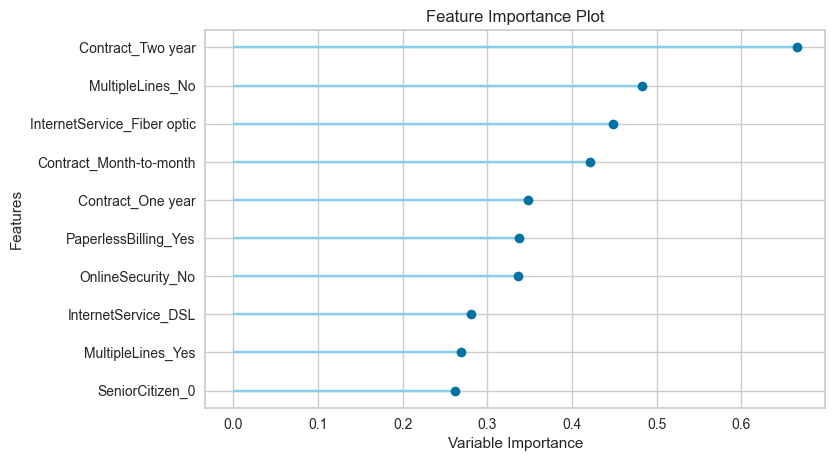

In [62]:
# Feature Importance Plot
plot_model(tuned_best_model, plot = 'feature')

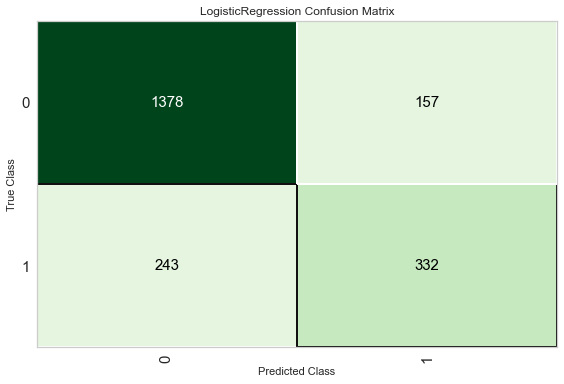

In [63]:
# Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')

In [64]:
# create a custom function
# Example using 1000 and 3000
def calculate_profit(y, y_pred):
    true_positive = np.where((y_pred==1) & (y==1), (3000-1000), 0)
    false_positive = np.where((y_pred==1) & (y==0), -1000, 0)
    return np.sum([true_positive,false_positive])
# add metric to PyCaret
add_metric('profit3', 'Profit3', calculate_profit)

Name                                                    Profit3
Display Name                                            Profit3
Score Function       <function calculate_profit at 0x1602439e0>
Scorer                            make_scorer(calculate_profit)
Target                                                     pred
Args                                                         {}
Greater is Better                                          True
Multiclass                                                 True
Custom                                                     True
Name: profit3, dtype: object

In [65]:
# Now let’s run compare_models and see the magic.
best_model = compare_models(sort='Profit3')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit3,TT (Sec)
nb,Naive Bayes,0.7434,0.8228,0.7682,0.5081,0.6114,0.4315,0.4525,102500.0000,0.0220
lr,Logistic Regression,0.7977,0.8352,0.5217,0.6423,0.5751,0.4443,0.4488,97300.0000,0.0850
ada,Ada Boost Classifier,0.7974,0.8332,0.5109,0.6461,0.5692,0.4395,0.4454,95800.0000,0.1520
lda,Linear Discriminant Analysis,0.7932,0.8286,0.5255,0.6272,0.5713,0.4366,0.4398,95600.0000,0.0380
gbc,Gradient Boosting Classifier,0.7962,0.8330,0.5024,0.6454,0.5638,0.4338,0.4402,94100.0000,0.3390
ridge,Ridge Classifier,0.7989,0.0000,0.4899,0.6584,0.5610,0.4344,0.4428,93800.0000,0.0190
lightgbm,Light Gradient Boosting Machine,0.7848,0.8224,0.4954,0.6125,0.5467,0.4081,0.4125,87600.0000,0.0720
rf,Random Forest Classifier,0.7814,0.8089,0.4621,0.6126,0.5260,0.3877,0.3947,81600.0000,0.5050
et,Extra Trees Classifier,0.7651,0.7764,0.4459,0.5693,0.4983,0.3485,0.3538,71500.0000,0.4710
knn,K Neighbors Classifier,0.7584,0.7372,0.4243,0.5532,0.4787,0.3256,0.3312,65400.0000,0.0920


### Encoding, scaling and splitting the data

In [66]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat)
encode_df.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [67]:
# Merge one-hot encoded features and drop the originals
df.reset_index(drop=True, inplace=True)
df = df.merge(encode_df, left_index=True, right_index=True)
df = df.drop(cat, 1)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,34,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,2,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0,45,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,2,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [68]:
# Split our preprocessed data into out features and target arrays
y = df["Churn_Yes"].values
X = df.drop(['Churn_Yes','Churn_No'],1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [69]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### RandomForestClassifier

In [70]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=100)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.774


In [71]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[1138,  143],
       [ 254,  223]])

In [72]:
# Print the imbalanced classification report - BalancedRandomForestClassifier
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.82      0.89      0.47      0.85      0.64      0.43      1281
        1.0       0.61      0.47      0.89      0.53      0.64      0.40       477

avg / total       0.76      0.77      0.58      0.76      0.64      0.42      1758



In [73]:
importance = rf_model.feature_importances_
importance

array([0.01956319, 0.13874392, 0.134343  , 0.1616035 , 0.01784375,
       0.01741762, 0.01378599, 0.01425153, 0.01180279, 0.01178664,
       0.00265521, 0.00282948, 0.01340233, 0.0028542 , 0.01284601,
       0.01269907, 0.02358868, 0.00236244, 0.03023832, 0.00207533,
       0.01113638, 0.01730408, 0.00249417, 0.0129787 , 0.01552661,
       0.00301424, 0.01143439, 0.03710205, 0.00283461, 0.00968164,
       0.01140139, 0.00236578, 0.01199415, 0.01106072, 0.00300738,
       0.01162321, 0.04961681, 0.01232244, 0.0169858 , 0.01607457,
       0.0155512 , 0.01192553, 0.01222295, 0.03250544, 0.01114277])

In [74]:
# List features with more impact 

important_features = pd.Series(data=rf_model.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features.head(15)

TotalCharges                      0.161604
tenure                            0.138744
MonthlyCharges                    0.134343
Contract_Month-to-month           0.049617
TechSupport_No                    0.037102
PaymentMethod_Electronic check    0.032505
OnlineSecurity_No                 0.030238
InternetService_Fiber optic       0.023589
SeniorCitizen                     0.019563
gender_Female                     0.017844
gender_Male                       0.017418
OnlineBackup_No                   0.017304
Contract_Two year                 0.016986
PaperlessBilling_No               0.016075
PaperlessBilling_Yes              0.015551
dtype: float64

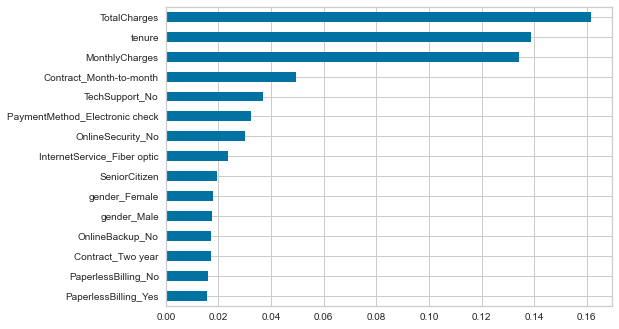

In [77]:
import matplotlib.pyplot as plt

plt.figure();
importance_df = important_features.head(15)
importance_df.sort_values(ascending=True,inplace=True)
importance_df.plot.barh();

### LogisticRegression

In [78]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train_scaled,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test_scaled)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.793


In [79]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,1141,140
Actual 1,224,253


In [80]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1281
         1.0       0.64      0.53      0.58       477

    accuracy                           0.79      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.78      0.79      0.79      1758



### Deep Learning Model

In [81]:
# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=45))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

2021-11-28 21:53:06.750101: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-28 21:53:06.983198: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
165/165 [==============================] - 1s 2ms/step - loss: 0.5588 - accuracy: 0.7361
Epoch 2/50
165/165 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.7361
Epoch 3/50
165/165 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7361
Epoch 4/50
165/165 [==============================] - 0s 3ms/step - loss: 0.4666 - accuracy: 0.7361
Epoch 5/50
165/165 [==============================] - 0s 2ms/step - loss: 0.4610 - accuracy: 0.7361
Epoch 6/50
165/165 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.7361
Epoch 7/50
165/165 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.7361
Epoch 8/50
165/165 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.7361
Epoch 9/50
165/165 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.7361
Epoch 10/50
165/165 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.7361

In [82]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

55/55 - 0s - loss: 0.4513 - accuracy: 0.7878
Loss: 0.45127227902412415, Accuracy: 0.7878270745277405


In [83]:
# Adding some settings to the basic neural model - attempt to improve accuracy

# Define the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=50, input_dim=45, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                2300      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 3,541
Trainable params: 3,541
Non-trainable params: 0
_________________________________________________________________


In [84]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="SGD", metrics=["accuracy"])

fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
165/165 [==============================] - 1s 2ms/step - loss: 0.5556 - accuracy: 0.7308
Epoch 2/50
165/165 [==============================] - 0s 3ms/step - loss: 0.4743 - accuracy: 0.7431
Epoch 3/50
165/165 [==============================] - 0s 2ms/step - loss: 0.4504 - accuracy: 0.7700
Epoch 4/50
165/165 [==============================] - 0s 2ms/step - loss: 0.4377 - accuracy: 0.7854
Epoch 5/50
165/165 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.7937
Epoch 6/50
165/165 [==============================] - 0s 3ms/step - loss: 0.4235 - accuracy: 0.7971
Epoch 7/50
165/165 [==============================] - 0s 3ms/step - loss: 0.4191 - accuracy: 0.8000
Epoch 8/50
165/165 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.8038
Epoch 9/50
165/165 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8051
Epoch 10/50
165/165 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8053

In [85]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

55/55 - 0s - loss: 0.4705 - accuracy: 0.7759
Loss: 0.4704837501049042, Accuracy: 0.7758817076683044


### Naive Bayes

In [88]:
# Training the Naive Bayes model on the training set
classifier = GaussianNB()
classifier.fit(X_train_scaled, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [89]:
y_pred = classifier.predict(X_test_scaled)
print(f" Naive Bayes model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Naive Bayes model accuracy: 0.680


In [90]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.90      0.63      0.74      1281
         1.0       0.45      0.82      0.58       477

    accuracy                           0.68      1758
   macro avg       0.68      0.72      0.66      1758
weighted avg       0.78      0.68      0.70      1758



In [91]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,805,476
Actual 1,87,390


### Naive Bayes - hyperparameter tuning

In [92]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [93]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=10, random_state=999)

In [94]:
from sklearn.preprocessing import PowerTransformer

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=GaussianNB(), param_grid=params_NB, cv=cv_method, verbose=1, scoring='recall')

Data_transformed = PowerTransformer().fit_transform(X_test_scaled)

gs_NB.fit(Data_transformed, y_test);

Fitting 50 folds for each of 100 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:   25.7s finished


In [95]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.6507394766780432


In [96]:
# Calculating the confusion matrix
cm3 = confusion_matrix(y_test, predict_test)

# Create a DataFrame from the confusion matrix.
cm_df3 = pd.DataFrame(
    cm3, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df3

,Predicted 0,Predicted 1
Actual 0,733,548
Actual 1,66,411


In [97]:
report = classification_report(y_test, predict_test)
print(report)

              precision    recall  f1-score   support

         0.0       0.92      0.57      0.70      1281
         1.0       0.43      0.86      0.57       477

    accuracy                           0.65      1758
   macro avg       0.67      0.72      0.64      1758
weighted avg       0.78      0.65      0.67      1758

